# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load dataset

In [624]:
data = pd.read_csv('scrapped_data_glints2.csv')
data.head()

,userName,score,at,label,content
0,Nanda Mmhmarsel,5,10/7/2024 5:41,positif,baik
1,Zhen Zen,2,10/7/2024 4:41,negatif,Kurang lengkap masalah info loker
2,Rachmad Rudianto,5,10/7/2024 2:10,positif,memuaskan
3,Bang zait,5,10/7/2024 1:39,positif,sangat mudah untuk mengirim email/ cv
4,Alan Walansari,5,10/6/2024 16:46,netral,"Semoga cepet² dapet pekerjaan,, aminnnn"


In [620]:
# Mapping label ke dalam angka
label_mapping = {'positif': 2, 'netral': 1, 'negatif': 0}
data['label_num'] = data['label'].map(label_mapping)

# Menampilkan hasil
print(data.head())

           userName  score               at    label  \
0   Nanda Mmhmarsel      5   10/7/2024 5:41  positif   
1          Zhen Zen      2   10/7/2024 4:41  negatif   
2  Rachmad Rudianto      5   10/7/2024 2:10  positif   
3         Bang zait      5   10/7/2024 1:39  positif   
4    Alan Walansari      5  10/6/2024 16:46   netral   

                                   content  label_num  
0                                     baik          2  
1        Kurang lengkap masalah info loker          0  
2                                memuaskan          2  
3    sangat mudah untuk mengirim email/ cv          2  
4  Semoga cepet² dapet pekerjaan,, aminnnn          1  


In [627]:
# Cek data duplikat
data.duplicated().sum()

0

In [628]:
# Cek missing values
data.isnull().sum()

userName    0
score       0
at          0
label       0
content     0
dtype: int64

In [621]:
data.drop(columns = ['userName', 'at', 'label', 'score'], inplace = True)
data.columns = ['content', 'label_num']
data.head()

,content,label_num
0,baik,2
1,Kurang lengkap masalah info loker,0
2,memuaskan,2
3,sangat mudah untuk mengirim email/ cv,2
4,"Semoga cepet² dapet pekerjaan,, aminnnn",1


# Preprocessing

## Case Folding

In [6]:
import re

In [644]:
# Fungsi untuk case folding (Pembersihan data)
def caseFolding(text):
    text = text.lower() # Merubah kalimat menjadi huruf kecil
    text = re.sub(r'https?://\S+|www\.\S', '', text) # Mengahpus url
    text = re.sub(r'[-+]?[0-9]+', '', text) # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # Menghapus tanda baca
    text = text.strip()
    return text

In [645]:
# Membandingkan before dan after case folding
raw_sample = data['content'].iloc[3]
case_folding = caseFolding(raw_sample)

print('Raw data\t :', raw_sample)
print('Case folding\t:', case_folding)

print('\n')

raw_sample = data['content'].iloc[4]
case_folding = caseFolding(raw_sample)

print('Raw data\t :', raw_sample)
print('Case folding\t:', case_folding)

Raw data	 : sangat mudah untuk mengirim email/ cv
Case folding	: sangat mudah untuk mengirim email cv


Raw data	 : Semoga cepet² dapet pekerjaan,, aminnnn
Case folding	: semoga cepet² dapet pekerjaan aminnnn


## World Normalization

In [659]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
    text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0]
                    if (key_norm['singkat'] == word).any()
                    else word for word in text.split()
                    ])
    text = str.lower(text)
    return text

In [660]:
# Membandingkan before after word normalization
raw_data = data['content'].iloc[65]
word_normal = text_normalize(raw_data)

print('Raw Data\t :', raw_data)
print('Word Normalization\t :', word_normal)

Raw Data	 : Thx glintts Alhamdulilah sudah dapet pekerjaan dari apk glints
Word Normalization	 : terima kasih glints alhamdulilah sudah dapat pekerjaan dari aplikasi glints


## Filtering (Stopword Removal)

In [548]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [661]:
len(stopwords_ind)

752

In [674]:
# Melihat daftar stopword dari nltk
stopwords_ind

{'ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut',
 'berik

In [663]:
# Daftar kata yang akan dicek dalam stopwords
words_to_check = ['baik','kurang', 'tidak', 'buruk', 'jelek', 'gagal', 
                'membingungkan', 'penipuan', 'cukup', 'biasa', 
                'standar', 'lumayan', 'oke', 'semoga', 'ku kasih']

# Loop untuk mengecek dan menghapus setiap kata
for word in words_to_check:
    if word in stopwords_ind:
        print(f"'{word}' ada di daftar stopwords.")
        stopwords_ind.remove(word)  # Menghapus jika ditemukan
        print(f"'{word}' telah dihapus dari daftar stopwords.")
    else:
        print(f"'{word}' tidak ada di daftar stopwords.")


'baik' tidak ada di daftar stopwords.
'kurang' tidak ada di daftar stopwords.
'tidak' tidak ada di daftar stopwords.
'buruk' tidak ada di daftar stopwords.
'jelek' tidak ada di daftar stopwords.
'gagal' tidak ada di daftar stopwords.
'membingungkan' tidak ada di daftar stopwords.
'penipuan' tidak ada di daftar stopwords.
'cukup' tidak ada di daftar stopwords.
'biasa' tidak ada di daftar stopwords.
'standar' tidak ada di daftar stopwords.
'lumayan' tidak ada di daftar stopwords.
'oke' tidak ada di daftar stopwords.
'semoga' tidak ada di daftar stopwords.
'ku kasih' tidak ada di daftar stopwords.


In [664]:
# Menambahkan kata dalam daftar stopwords
more_stopword = ['xixi']
stopwords_ind = set(stopwords_ind)  # Konversi ke set untuk optimasi

# Kata-kata negatif yang bisa mempengaruhi sentimen
negative_words = ['kurang', 'tidak', 'buruk', 'jelek', 'gagal', 'membingungkan', 'penipuan']

# Kata-kata netral untuk mendeteksi sentimen netral
neutral_words = ['cukup', 'biasa', 'standar', 'lumayan', 'oke', 'semoga', 'ku kasih']

# Fungsi untuk menghapus stopwords dan mendeteksi kata negatif/netral, tanpa menampilkan sentimen dalam hasil
def remove_stop_word_and_detect_sentiment(normalized_token_list):
    # Pastikan input adalah list token
    if isinstance(normalized_token_list, str):
        normalized_token_list = normalized_token_list.split()
    
    # Proses stopword removal, menghapus kata yang ada dalam stopwords_ind
    clean_words = [word for word in normalized_token_list if word not in stopwords_ind]
    
    # Deteksi sentimen berdasarkan kata negatif/netral, dilakukan pada clean_words
    contains_negative = any(neg_word in clean_words for neg_word in negative_words)
    contains_neutral = any(neu_word in clean_words for neu_word in neutral_words)
    
    # Tentukan label sentimen (hanya untuk proses, tidak dimasukkan dalam hasil)
    sentiment_status = ''
    if contains_negative:
        sentiment_status = 'negatif'
    elif contains_neutral:
        sentiment_status = 'netral'
    
    # Gabungkan list kata yang sudah bersih menjadi teks (string)
    cleaned_text = " ".join(clean_words)
    
    # Kembalikan hanya teks yang sudah dibersihkan, tanpa sentimen di belakangnya
    return cleaned_text


In [679]:
raw_sample = data['content'].iloc[65]
case_folding = caseFolding(raw_sample)
stopword_removal = remove_stop_word_and_detect_sentiment(case_folding)

print('Raw Data \t\t', raw_data)
print('Case Folding \t\t', case_folding)
print('Stopword Removal \t\t', stopword_removal)

Raw Data 		 Thx glintts Alhamdulilah sudah dapet pekerjaan dari apk glints
Case Folding 		 thx glintts alhamdulilah sudah dapet pekerjaan dari apk glints
Stopword Removal 		 thx glintts alhamdulilah dapet pekerjaan apk glints


## Stemming

In [503]:
!pip -q install sastrawi

In [666]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer Bahasa Indonesia menggunakan Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk stemming Bahasa Indonesia
def stemming(cleaned_words):
    # Pastikan input berupa daftar kata, bukan string
    if isinstance(cleaned_words, str):
        cleaned_words = cleaned_words.split()  # Pisahkan string menjadi list kata
    
    # Lakukan stemming pada setiap kata
    stemmed_words = [stemmer.stem(word) for word in cleaned_words]
    
    # Gabungkan kata-kata yang sudah di-stem kembali menjadi satu string
    return " ".join(stemmed_words)


In [680]:
raw_sample = data['content'].iloc[65]
case_folding = caseFolding(raw_sample)
stopword_removal = remove_stop_word_and_detect_sentiment(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw Data \t\t :', raw_sample)
print('Case Folding \t\t :', case_folding)
print('Stopword Removal \t\t :',stopword_removal)
print('Stemming \t\t :',text_stemming)

Raw Data 		 : Thx glintts Alhamdulilah sudah dapet pekerjaan dari apk glints
Case Folding 		 : thx glintts alhamdulilah sudah dapet pekerjaan dari apk glints
Stopword Removal 		 : thx glintts alhamdulilah dapet pekerjaan apk glints
Stemming 		 : thx glintts alhamdulilah dapet kerja apk glints


## Text preprocessing pipeline

In [668]:
# Fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
    text = caseFolding(text)  # Langkah pertama: Case folding
    text = text_normalize(text)  # Langkah kedua: Normalisasi teks
    text = remove_stop_word_and_detect_sentiment(text)  # Langkah ketiga: Stopword removal tanpa sentimen
    text = stemming(text)  # Langkah keempat: Stemming
    return text  # Mengembalikan hanya teks yang sudah diproses


In [557]:
%%time
data['clean_teks'] = data['content'].apply(text_preprocessing_process)

CPU times: total: 3min 13s
Wall time: 8min 24s


In [558]:
data

,content,label_num,clean_teks
0,baik,2,baik
1,Kurang lengkap masalah info loker,0,kurang lengkap informasi loker
2,memuaskan,2,muas
3,sangat mudah untuk mengirim email/ cv,2,mudah kirim email cv
4,"Semoga cepet² dapet pekerjaan,, aminnnn",1,moga cepet dapet kerja aminnnn
...,...,...,...
1995,"Apakah ini harus tatap muka, datang gtu ke per...",1,tatap muka usaha nya
1996,semoga ada yang keterima kerjaan saya,1,moga terima kerja
1997,sangat memuaskan,2,muas
1998,sangat membantu,2,bantu


## Visualisasi Data

In [597]:
import seaborn as sns
from wordcloud import WordCloud  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15196\3364981448.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label_num', data=data, palette=palette)


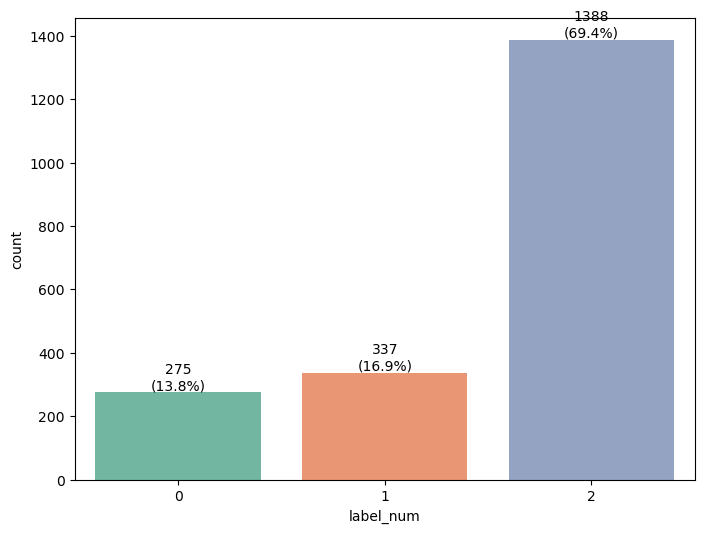

In [595]:
# Visualisasi Data
# Membuat palet warna berbeda untuk setiap kategori
palette = sns.color_palette("Set2", data['label_num'].nunique())  # Set palet dengan jumlah warna sesuai kategori

# Plot countplot dengan palet warna khusus
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label_num', data=data, palette=palette)

# Menghitung jumlah total data
total = len(data)

# Menambahkan jumlah dan persentase pada setiap batang
for p in ax.patches:
    count = int(p.get_height())  # jumlah data pada tiap kategori
    percentage = f'{100 * count / total:.1f}%'  # persentase
    x = p.get_x() + p.get_width() / 2  # posisi x untuk teks
    y = p.get_height()  # posisi y untuk teks
    ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom')

# Menampilkan plot
plt.show()

Word Clouds

In [599]:
df_positive = data[ (data['label_num']==2)]
df_netral = data[ (data['label_num']==1)]
df_negative = data[ (data['label_num']==0)]

#convert to list
positive_list= df_positive['clean_teks'].tolist()
netral_list=df_netral['clean_teks'].tolist()
negative_list=df_negative['clean_teks'].tolist()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

filtered_netral = ("").join(str(netral_list)) #convert the list into a string of ham
filtered_netral = filtered_netral.lower()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

- Word Cloud: Positive Reviews

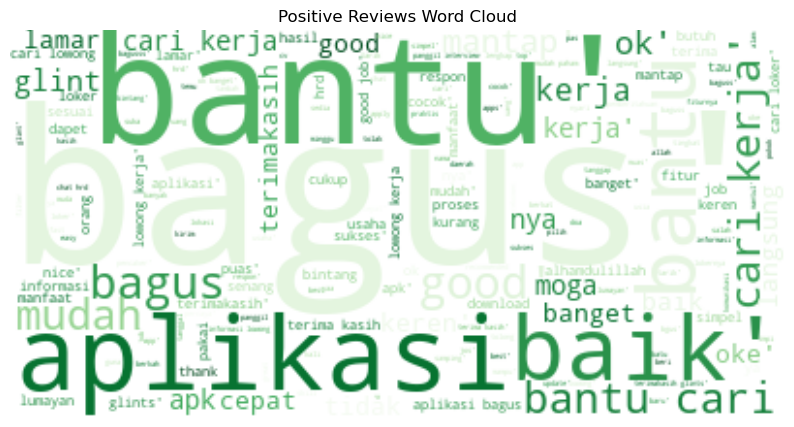

In [600]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

- Word Cloud: Netral Reviews

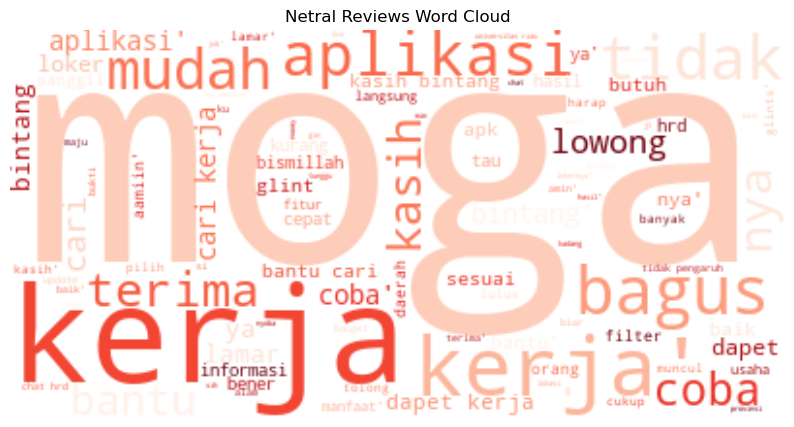

In [601]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_netral)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Netral Reviews Word Cloud")
plt.show()

- Word Cloud: Negative Reviews

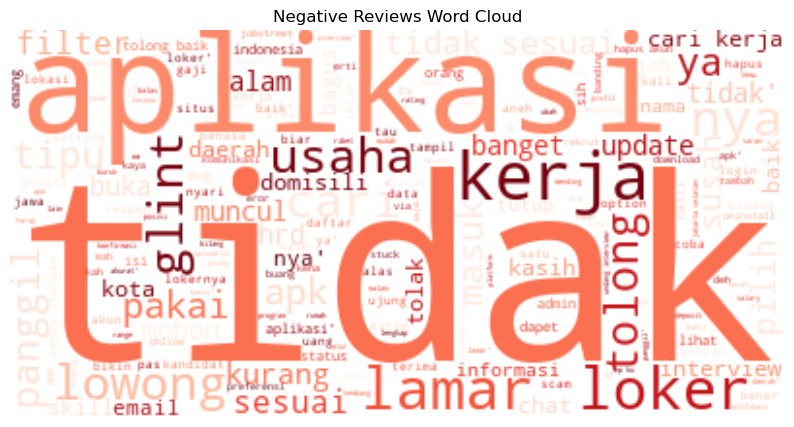

In [602]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

In [603]:
# Simpan data yang sudah dipreprocessing ke file csv
data.to_csv('clean_data_glints.csv')

# Feature Engineering

In [560]:
# Pisahkan kolom feature dan target
x = data['clean_teks']
y = data['label_num']

In [561]:
x

0                                 baik
1       kurang lengkap informasi loker
2                                 muas
3                 mudah kirim email cv
4       moga cepet dapet kerja aminnnn
                     ...              
1995              tatap muka usaha nya
1996                 moga terima kerja
1997                              muas
1998                             bantu
1999                              baik
Name: clean_teks, Length: 2000, dtype: object

In [562]:
y

0       2
1       0
2       2
3       2
4       1
       ..
1995    1
1996    1
1997    2
1998    2
1999    2
Name: label_num, Length: 2000, dtype: int64

## Feature Ectraction (TF-IDF dan N-Gram)

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Membuat TfidfVectorizer dengan konfigurasi tertentu
vec_TF_IDF = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

# Latih TF-IDF pada data input (x)
x_tf_idf = vec_TF_IDF.fit_transform(x)

# Simpan vocabulary ke file menggunakan pickle
with open("features_tf-idf.sav", "wb") as file:
    pickle.dump(vec_TF_IDF.vocabulary_, file)


In [565]:
# Menampilkan vocabulary
vec_TF_IDF.vocabulary_

{'baik': 579,
 'kurang': 2219,
 'lengkap': 2253,
 'informasi': 1780,
 'loker': 2266,
 'kurang lengkap': 2222,
 'informasi loker': 1787,
 'muas': 2642,
 'mudah': 2654,
 'kirim': 2116,
 'email': 1610,
 'cv': 1354,
 'mudah kirim': 2680,
 'kirim email': 2120,
 'email cv': 1612,
 'moga': 2565,
 'cepet': 1254,
 'dapet': 1410,
 'kerja': 1957,
 'aminnnn': 172,
 'moga cepet': 2582,
 'cepet dapet': 1255,
 'dapet kerja': 1414,
 'mantap': 2377,
 'tidak': 4355,
 'erti': 1651,
 'pakai': 3098,
 'tampil': 4166,
 'interface': 1793,
 'bingung': 981,
 'fitur': 1690,
 'search': 3720,
 'and': 184,
 'filter': 1686,
 'bantu': 697,
 'ngomong': 2805,
 'temen': 4243,
 'detail': 1475,
 'tipu': 4539,
 'tidak erti': 4389,
 'erti pakai': 1653,
 'pakai tampil': 3115,
 'tampil interface': 4168,
 'bingung fitur': 983,
 'search and': 3721,
 'and filter': 187,
 'filter tidak': 1689,
 'tidak bantu': 4370,
 'bantu ngomong': 732,
 'ngomong ngomong': 2806,
 'ngomong temen': 2807,
 'temen temen': 4245,
 'temen detail': 4244,

In [566]:
# Melihat jumlah features
print(len(vec_TF_IDF.get_feature_names_out()))

5000


In [567]:
x1 = vec_TF_IDF.transform(x).toarray()
data_tabular_tf_idf = pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names_out())
data_tabular_tf_idf

,aalamiin,aameen,aamiin,aamiin allah,aamiin yaa,aamiinn,aangat,aangat recommended,abal,abal nama,...,yh,yohanes,yohanes stmpl,youu,youu glints,yuk,yuk gabung,zona,zona nyaman,zonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [568]:
data_tabular_tf_idf.iloc[10:20,60:70]

,akan becandaan,akhir,akhir glints,akn,akn loker,akses,akses kerja,aktif,aktif giat,aktifitas
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

In [569]:
x_train = np.array(data_tabular_tf_idf)
y_train = np.array(y)

In [570]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k=3000)
x_kbest_features = chi2_features.fit_transform(x_train, y_train)

# Reduce features
print('Original Features Number', x_train.shape[1])
print('Reduce Feature Number', x_kbest_features.shape[1])

Original Features Number 5000
Reduce Feature Number 3000


In [571]:
Data = pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,0.090706
1,0.074875
2,8.995302
3,0.133715
4,0.090706
...,...
4995,0.267927
4996,0.267927
4997,0.114677
4998,0.114677


In [572]:
# Menampilkan data feature beserta nilainya
feature = vec_TF_IDF.get_feature_names_out()
feature

Data['Fitur'] = feature
Data

,Nilai,Fitur
0,0.090706,aalamiin
1,0.074875,aameen
2,8.995302,aamiin
3,0.133715,aamiin allah
4,0.090706,aamiin yaa
...,...,...
4995,0.267927,yuk
4996,0.267927,yuk gabung
4997,0.114677,zona
4998,0.114677,zona nyaman


In [573]:
# Mengurutkan nilai fitur terbaik
Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
4355,111.207134,tidak
2565,76.528361,moga
464,64.235988,bagus
1294,55.432405,coba
697,49.693295,bantu
...,...,...
2525,0.055096,minder aju
2524,0.055096,minder
4796,0.055096,usaha kriteria
2283,0.051606,lowker


In [574]:
mask = chi2_features.get_support()
mask

array([False, False,  True, ..., False, False,  True])

In [575]:
# Menampilkan fitur yang terpilih berdasarkan nilai mask atau nilai tertinggi yang sudah ditetapkan pada chi square

new_feature=[]
for bool, f in zip(mask, feature):
    if bool :
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

['aamiin',
 'aamiinn',
 'abal',
 'abal nama',
 'abalabal',
 'abalabal interview',
 'abdulmaliknafar',
 'abdulmaliknafar driversimbumumpropesional',
 'acak',
 'accounting',
 'accounting manager',
 'ada',
 'ada fake',
 'adain',
 'adain fitur',
 'admin',
 'admin nya',
 'admin pesan',
 'admin purchasing',
 'admin ssl',
 'admin sudha',
 'admin tolak',
 'admin tugas',
 'aga',
 'aga nga',
 'aga susah',
 'agam jenis',
 'ah',
 'ajar',
 'ajar bukti',
 'ajja',
 'ajja terima',
 'aju tidak',
 'akal',
 'akan',
 'akan becandaan',
 'akses',
 'akses kerja',
 'akun',
 'akun apk',
 'akun email',
 'akun glints',
 'akun google',
 'akun grints',
 'akun pakai',
 'akun parahhh',
 'akun saran',
 'akun susah',
 'akun viuw',
 'akurat',
 'akurat atur',
 'akurat ya',
 'ala',
 'ala jalan',
 'ala kendala',
 'alam',
 'alam admin',
 'alam aga',
 'alam alam',
 'alam cari',
 'alam cleaning',
 'alam cukup',
 'alam finance',
 'alam glints',
 'alam kerja',
 'alam kerjaperilaku',
 'alam milik',
 'alam posisi',
 'alam reject

In [576]:
# Membuat vocabulary baru berdasarkan fitur yang terseleksi

new_selected_feature = {}

for (k,v) in vec_TF_IDF.vocabulary_.items():
    if k in selected_feature:
        new_selected_feature[k]=v
        
new_selected_feature

{'baik': 579,
 'kurang': 2219,
 'loker': 2266,
 'kurang lengkap': 2222,
 'informasi loker': 1787,
 'muas': 2642,
 'mudah': 2654,
 'kirim': 2116,
 'email': 1610,
 'cv': 1354,
 'moga': 2565,
 'cepet': 1254,
 'dapet': 1410,
 'kerja': 1957,
 'aminnnn': 172,
 'moga cepet': 2582,
 'cepet dapet': 1255,
 'dapet kerja': 1414,
 'mantap': 2377,
 'tidak': 4355,
 'erti': 1651,
 'pakai': 3098,
 'tampil': 4166,
 'bingung': 981,
 'fitur': 1690,
 'search': 3720,
 'filter': 1686,
 'bantu': 697,
 'ngomong': 2805,
 'tipu': 4539,
 'tidak erti': 4389,
 'erti pakai': 1653,
 'pakai tampil': 3115,
 'tampil interface': 4168,
 'bingung fitur': 983,
 'search and': 3721,
 'and filter': 187,
 'filter tidak': 1689,
 'tidak bantu': 4370,
 'bantu ngomong': 732,
 'ngomong ngomong': 2806,
 'ngomong temen': 2807,
 'temen detail': 4244,
 'detail loker': 1476,
 'loker tipu': 2277,
 'tipu haha': 4540,
 'rezeki': 3568,
 'moga rezeki': 2615,
 'bagus': 464,
 'panggil': 3126,
 'panggil kerja': 3132,
 'lumayan': 2296,
 'data': 1

In [577]:
len(new_selected_feature)

3000

In [578]:
pickle.dump(new_selected_feature, open("new_selected_feature_tf-idf.sav", "wb"))

In [579]:
# Menampilkan fitur-fitur yang sudah diseleksi

data_selected_feature = pd.DataFrame(x_kbest_features, columns=selected_feature)
data_selected_feature

,aamiin,aamiinn,abal,abal nama,abalabal,abalabal interview,abdulmaliknafar,abdulmaliknafar driversimbumumpropesional,acak,accounting,...,yaa tolong,yaaa,yaaa respon,yasaya,yasaya komunikasi,yeee,yh,yohanes,yohanes stmpl,zonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modeling

In [580]:
selected_x = x_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [581]:
# Import library
import random
from sklearn.model_selection import train_test_split

# Import Algortima SVM
from sklearn.svm import SVC  

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [582]:
x = selected_x
y = data.label_num

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

In [583]:
# Menampilkan jumlah data training dan data testing
print('Banyaknya X_train : ', len(x_train))
print('Banyaknya X_test : ', len(x_test))
print('Banyaknya y_train : ', len(y_train))
print('Banyaknya y_test : ', len(y_test))

Banyaknya X_train :  1800
Banyaknya X_test :  200
Banyaknya y_train :  1800
Banyaknya y_test :  200


In [681]:
# Menyiapkan model SVM

class_weights = {0: 1, 1: 2, 2: 1}

model = SVC(kernel='rbf', C=100, gamma='scale', class_weight=class_weights)  

# Melatih model pada data yang sudah di-resample
model.fit(x_train, y_train)


SVC(C=100, class_weight={0: 1, 1: 2, 2: 1})

In [ ]:
# Evaluasi model pada data pengujian 
y_pred = model.predict(x_test)

# Menampilkan hasil evaluasi
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        26
           1       0.75      0.80      0.77        30
           2       0.96      0.97      0.96       144

    accuracy                           0.92       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.92      0.92      0.92       200



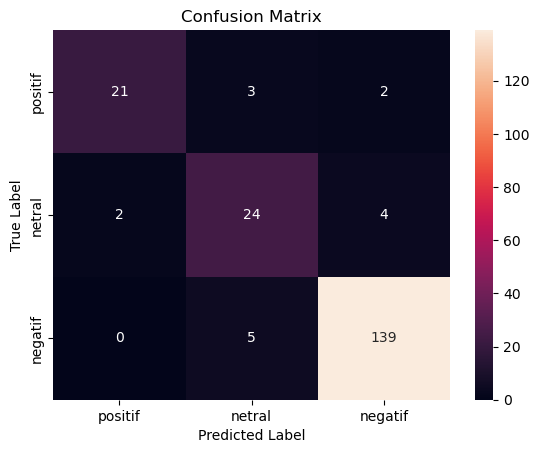

In [ ]:
# Confusion Matrix
class_label = ["positif", "netral", "negatif"]
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

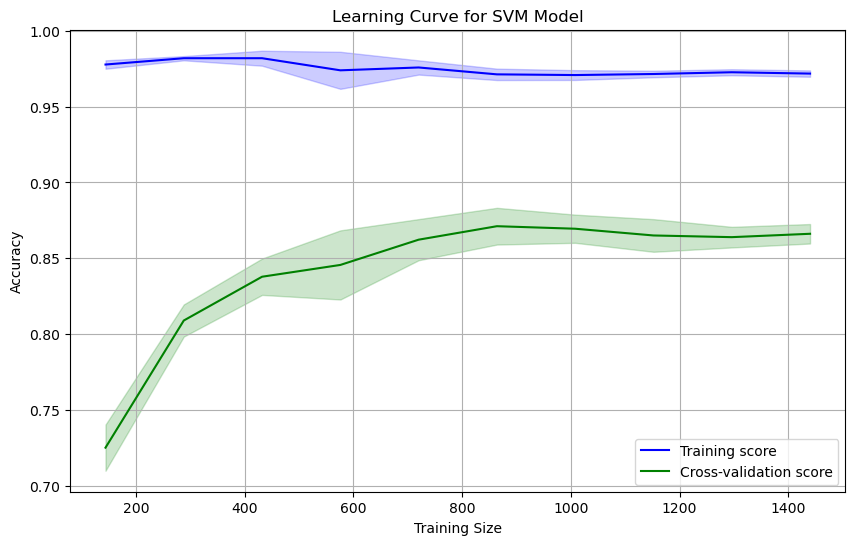

In [612]:
from sklearn.model_selection import learning_curve

# Membuat learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, x_train, y_train, cv=5, scoring='accuracy', 
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Menghitung rata-rata dan deviasi standar untuk skor pelatihan dan pengujian
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green')

# Menambahkan shaded area untuk deviasi standar
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title('Learning Curve for SVM Model')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [609]:
# Simpan model yang sudah dilatih
with open("model_sentimen_glints.sav", "wb") as file:
    pickle.dump(model, file)


In [608]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Daftar kata sentimen
negative_words = ['kurang', 'tidak', 'buruk', 'jelek', 'gagal', 'menipu', 'mengecewakan', 'lelet', 'sulit', 'parah', 'penipuan', 'lambat']
neutral_words = ['cukup', 'biasa', 'standar', 'lumayan', 'oke', 'semoga', 'ku kasih', 'rata-rata', 'moderasi']
positive_words = ['baik', 'bagus', 'memuaskan', 'cepat', 'hebat', 'terbaik', 'puas', 'sempurna', 'luar biasa']

# Fungsi tambahan untuk mendeteksi kata sentimen
def detect_sentiment_keywords(text):
    text_tokens = text.lower().split()
    contains_negative = any(word in text_tokens for word in negative_words)
    contains_neutral = any(word in text_tokens for word in neutral_words)
    contains_positive = any(word in text_tokens for word in positive_words)
    
    if contains_negative:
        return "Negatif"
    elif contains_positive:
        return "Positif"
    elif contains_neutral:
        return "Netral"
    else:
        return None

# Memuat vocabulary yang sudah disimpan
with open("features_tf-idf.sav", "rb") as file:
    vocab = pickle.load(file)

# Membuat TfidfVectorizer dengan vocabulary yang sudah disesuaikan dan maksimal fitur sesuai dengan model
vec_TF_IDF_loaded = TfidfVectorizer(ngram_range=(1, 2), vocabulary=vocab, decode_error="ignore", use_idf=True, max_features=3000)

# Melakukan fit pada dokumen kosong untuk memastikan vectorizer siap digunakan
vec_TF_IDF_loaded.fit([""])  # Fitting pada dokumen kosong agar vectorizer bisa digunakan

# Transformasi data input
data_input = "bagus dan lengkap masalah info loker"
data_input_transformed = vec_TF_IDF_loaded.transform([data_input])

# Mengonversi sparse matrix ke array yang lebih mudah dikelola
data_input_dense = data_input_transformed.toarray()

# Memastikan jumlah fitur sesuai dengan yang diharapkan (3000 fitur)
if data_input_dense.shape[1] < 3000:
    padding = np.zeros((data_input_dense.shape[0], 3000 - data_input_dense.shape[1]))
    data_input_dense = np.hstack([data_input_dense, padding])
elif data_input_dense.shape[1] > 3000:
    data_input_dense = data_input_dense[:, :3000]

# Memuat model sentimen
with open("model_sentimen_glints.sav", "rb") as file:
    loaded_data = pickle.load(file)

# Ambil model dari dictionary
model = loaded_data['model']

# Prediksi menggunakan model
hasil_model = model.predict(data_input_dense)

# Logika untuk menampilkan prediksi dengan kata kunci
hasil_keywords = detect_sentiment_keywords(data_input)

if hasil_keywords:
    print(f"Komentar berdasarkan kata kunci: {hasil_keywords}")
else:
    if hasil_model[0] == 0:
        print("Komentar Negatif (Model)")
    elif hasil_model[0] == 1:
        print("Komentar Netral (Model)")
    elif hasil_model[0] == 2:
        print("Komentar Positif (Model)")
    else:
        print("Prediksi tidak valid.")


Komentar berdasarkan kata kunci: Positif
